In [1]:
from settings import *

random_rho0s: setting seed=96931


In [2]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

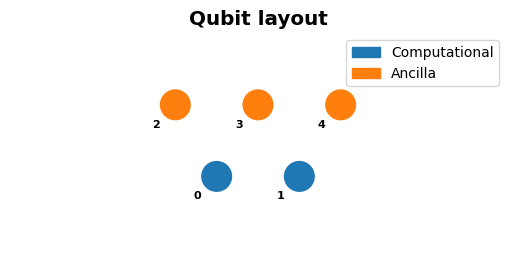

In [3]:
qubits.show_layout()

In [4]:
qubits.gate_connections

[GateConnection(id1=0, id2=1, d=0.9),
 GateConnection(id1=0, id2=2, d=0.9),
 GateConnection(id1=0, id2=3, d=0.9),
 GateConnection(id1=1, id2=3, d=0.9),
 GateConnection(id1=1, id2=4, d=0.9),
 GateConnection(id1=2, id2=3, d=0.9),
 GateConnection(id1=3, id2=4, d=0.9000000000000001)]

In [5]:
theta_init = np.load("both_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=200, n_grad=10, theta_init=theta_init)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=78242


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


-----
        Grad calculation time: 
        159.89387106895447 
        Armijo calculation time: 
        18.406470775604248 
        Total grad descend time: 
        2:58.30


In [7]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

In [8]:
theta_opt

array([0.98801449, 0.88925033, 1.        , 1.        , 1.        ,
       1.67331426, 1.62596201, 0.82775213, 0.65086448, 0.86056319,
       0.94418583, 0.7124485 , 1.42909091, 1.04811395, 1.55075368,
       1.16674447, 0.86824589, 1.00310693, 1.71717358, 1.03649236,
       1.64095448, 0.94650149, 0.76776943, 1.10250083, 0.90802002,
       1.02373522, 0.87449318, 1.20551543, 1.08692987, 1.03979778,
       0.81147144, 0.61111881, 1.04857363, 0.71924992, 1.07507958,
       1.08465027, 1.22266033, 0.93416916, 1.02499931, 0.98249916,
       1.24472304, 0.91605625, 0.8924021 , 0.90329289, 1.20091741,
       1.39486988, 1.27056484, 1.14624095, 0.74203642, 0.7159404 ,
       1.19309208, 1.20870871, 1.263647  , 1.06216722, 1.07875394,
       0.96846656, 1.01989323, 0.99799721, 0.9512605 , 1.17476952,
       1.12603007, 0.88773742, 1.27814564, 0.95765925, 1.11260394,
       1.02746511, 1.18092397, 0.97619861, 0.97786381, 1.30548829,
       1.36920309, 0.69526953, 1.11349983, 0.6734425 , 1.11162

rho_rand_haar: seed=14697


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

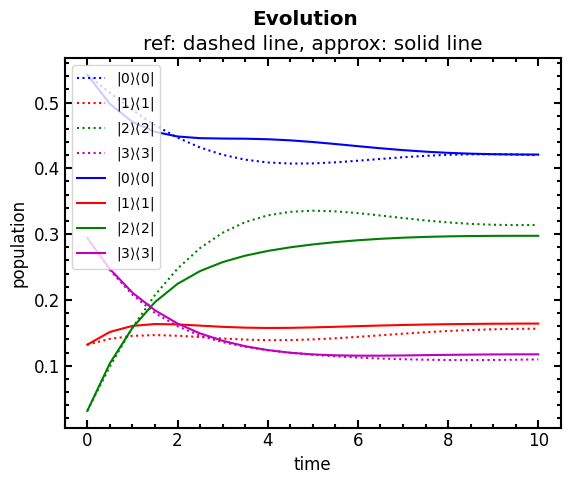

In [12]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(20, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=20, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

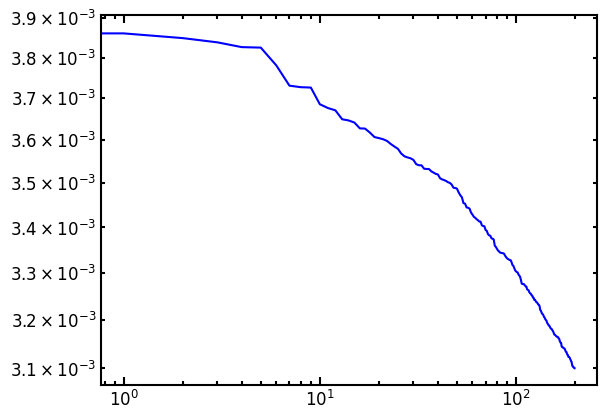

In [10]:
plt.loglog(errors)